In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 52s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape             

(32, 32, 3)

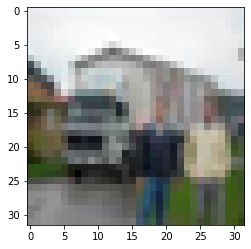

In [12]:
plt.imshow(x_train[16])

In [13]:
x_train.max()

255

In [14]:
x_train = x_train/255

In [15]:
x_test = x_test/255

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
y_cat_test = to_categorical(y_test,10)

In [21]:
y_train[0]

array([6], dtype=uint8)

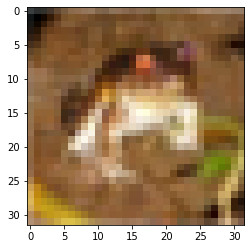

In [22]:
plt.imshow(x_train[0])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [26]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [30]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4766 - accuracy: 0.4691 - val_loss: 1.2423 - val_accuracy: 0.5584
Epoch 2/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1428 - accuracy: 0.5973 - val_loss: 1.1321 - val_accuracy: 0.6010
Epoch 3/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9951 - accuracy: 0.6504 - val_loss: 1.0093 - val_accuracy: 0.6514
Epoch 4/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8933 - accuracy: 0.6887 - val_loss: 0.9683 - val_accuracy: 0.6641
Epoch 5/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8113 - accuracy: 0.7159 - val_loss: 0.9786 - val_accuracy: 0.6609
Epoch 6/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7335 - accuracy: 0.7424 - val_loss: 0.9309 - val_accuracy: 0.6849
Epoch 7/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6596 - accuracy: 0.7677 - val_loss: 0.9663 -

In [31]:
metrics = pd.DataFrame(model.history.history)

In [32]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.476591,0.46912,1.242273,0.5584
1,1.142837,0.59730,1.132061,0.6010
2,0.995099,0.65036,1.009282,0.6514
3,0.893301,0.68868,0.968335,0.6641
4,0.811290,0.71594,0.978565,0.6609
5,0.733480,0.74240,0.930877,0.6849
6,0.659585,0.76774,0.966267,0.6774
7,0.590792,0.79144,1.031142,0.6786


<AxesSubplot:>

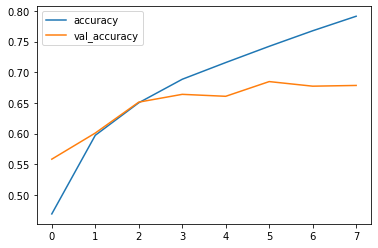

In [34]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

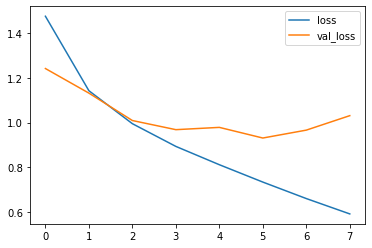

In [35]:
metrics[['loss','val_loss']].plot()

In [36]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.031142234802246, 0.678600013256073]

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
pred_probs = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [45]:
predictions = np.argmax(pred_probs, axis=1)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1000
           1       0.84      0.76      0.80      1000
           2       0.57      0.59      0.58      1000
           3       0.49      0.48      0.49      1000
           4       0.70      0.53      0.60      1000
           5       0.53      0.64      0.58      1000
           6       0.64      0.84      0.73      1000
           7       0.83      0.64      0.72      1000
           8       0.81      0.77      0.79      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



<AxesSubplot:>

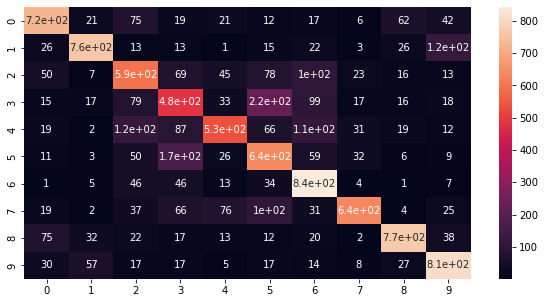

In [49]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [56]:
my_image = x_test[16]

In [58]:
my_image

array([[[0.37254902, 0.29803922, 0.30588235],
        [0.36078431, 0.30196078, 0.30588235],
        [0.34901961, 0.30196078, 0.30196078],
        ...,
        [0.11764706, 0.10980392, 0.14901961],
        [0.68627451, 0.71764706, 0.74901961],
        [0.88235294, 0.91764706, 0.94117647]],

       [[0.35294118, 0.27843137, 0.28627451],
        [0.3372549 , 0.28235294, 0.28235294],
        [0.3254902 , 0.27843137, 0.27843137],
        ...,
        [0.        , 0.        , 0.05098039],
        [0.23529412, 0.24705882, 0.30980392],
        [0.64705882, 0.67058824, 0.74117647]],

       [[0.34509804, 0.27058824, 0.27843137],
        [0.32941176, 0.2745098 , 0.2745098 ],
        [0.32156863, 0.2745098 , 0.2745098 ],
        ...,
        [0.01960784, 0.        , 0.04705882],
        [0.09411765, 0.10196078, 0.18823529],
        [0.49803922, 0.54509804, 0.64705882]],

       ...,

       [[0.79607843, 0.69019608, 0.63137255],
        [0.83529412, 0.68627451, 0.61176471],
        [0.79215686, 0

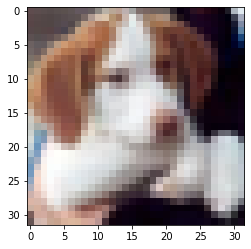

In [59]:
plt.imshow(my_image)

In [61]:
y_test[16]

array([5], dtype=uint8)